# Validation

### Import stuff

In [1]:
microsimDir = "/Users/christos/Google Drive/My Drive/OSU/microsim"
analysisDir = "/Users/christos/Google Drive/My Drive/OSU/VALIDATION"

In [2]:
import os
os.chdir(microsimDir)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%autosave 120

Autosaving every 120 seconds


In [5]:
import numpy as np

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

In [7]:
#not sure if I need this
import multiprocessing as mp
if mp.get_start_method() != 'fork':
    mp.set_start_method('forkserver', force=True) #needed to force it

In [8]:
import time

In [9]:
import statistics

 ### Validation of Baseline Simulated Population (VBS)

NHANES 2007-2009

In [12]:
from microsim.population import NHANESDirectSamplePopulation

In [16]:
sizePopVBS=50000

In [21]:
#NHANES ovesampled some subgroups, oversampled subgroups being different every survey period, Q: do I need to worry?
#Q Is NHANESAgeStandardPopulation doing an WHO-based standardization? 
#NHANES included ages 0 and above Q: do I need to always filter out ages 17 and less?
# Q: from the manuscript "survey-weighted selection", what weights were used?
start_time=time.time()
PopVBS = NHANESDirectSamplePopulation(sizePopVBS, year=2007) #NHANES 2007-2009
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

2.0141384998957315


In [22]:
# Q: is there a better way to access attributes of the population?
AgesVBS=list(map(lambda x: PopVBS._people.iloc[x]._age[0], range(0,sizePopVBS)))

In [23]:
#NHANES 45.9, simulation 45.9
statistics.mean(AgesVBS)

45.7747

In [26]:
import microsim.gender

In [27]:
GendersVBS=list(map(lambda x: PopVBS._people.iloc[x]._gender.value, range(0,sizePopVBS)))

In [29]:
#NHANES %female 51.7, simulation %female 51.7
for gender in microsim.gender.NHANESGender:
    print("%",gender.name, " ",GendersVBS.count(gender.value)/sizePopVBS)

% MALE   0.4848
% FEMALE   0.5152


In [30]:
import microsim.race_ethnicity

In [31]:
RaceEthnicitiesVBS=list(map(lambda x: PopVBS._people.iloc[x]._raceEthnicity.value, range(0,sizePopVBS)))

In [33]:
#NHANES W 68.4 B 11.5 H 13.6, SIMULATION W 68.3 B 11.4 H 13.6
for race in microsim.race_ethnicity.NHANESRaceEthnicity:
    print("%",race.name, " ",RaceEthnicitiesVBS.count(race.value)/sizePopVBS)

% MEXICAN_AMERICAN   0.08572
% OTHER_HISPANIC   0.0506
% NON_HISPANIC_WHITE   0.68896
% NON_HISPANIC_BLACK   0.11508
% OTHER   0.05964


In [34]:
BMIVBS=list(map(lambda x: PopVBS._people.iloc[x]._bmi[0], range(0,sizePopVBS)))

In [35]:
#NHANES and simulation 28.5
statistics.mean(BMIVBS)

28.418193

NHANES 2013 Hypertension

In [40]:
# Q: is this how a hypertension group can be defined? 
# Q: Should I use x._current_bp_treatment == True) or (x._sbp > 140.) or (x._dbp >90.) instead? 
# Q: Do the cutoffs (140/90) depend on race, age etc perhaps?
# Q: I am creating an entire population and then getting only a subgroup...should I get the entire population
# and then filter out?
start_time=time.time()
#NHANES 2013 hypertension group
PopVBSht = NHANESDirectSamplePopulation(sizePopVBS, year=2013, filter=lambda x: x._antiHypertensiveCount[0]>0) 
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

2.5239899158477783


In [46]:
# Q: I was expecting this to be the size of the subgroup, but it is not..it is the size of the population
sizePopVBSht=PopVBSht.n
PopVBSht.n

50000

In [51]:
sizePopVBSht=len(PopVBSht._people)

In [52]:
AgesVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._age[0], range(0,sizePopVBSht)))

In [53]:
#NHANES 60, simulation 58.4
statistics.mean(AgesVBSht)

60.07461351731187

In [54]:
GendersVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._gender.value, range(0,sizePopVBSht)))

In [55]:
#NHANES %female 50.0, simulation %female 49.7
for gender in microsim.gender.NHANESGender:
    print("%",gender.name, " ",GendersVBSht.count(gender.value)/sizePopVBSht)

% MALE   0.4857544397598058
% FEMALE   0.5142455602401942


In [56]:
RaceEthnicitiesVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._raceEthnicity.value, range(0,sizePopVBSht)))

In [57]:
#NHANES W 71 B 14.0 H 10.0, SIMULATION W 69.6 B 14.0 H 10.3
for race in microsim.race_ethnicity.NHANESRaceEthnicity:
    print("%",race.name, " ",RaceEthnicitiesVBSht.count(race.value)/sizePopVBSht)

% MEXICAN_AMERICAN   0.05666283378050339
% OTHER_HISPANIC   0.035965248498786254
% NON_HISPANIC_WHITE   0.7044844768110388
% NON_HISPANIC_BLACK   0.14711894723393382
% OTHER   0.05576849367573783


In [58]:
BMIVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._bmi[0], range(0,sizePopVBSht)))

In [59]:
#NHANES 31.0 and simulation 30.9
statistics.mean(BMIVBSht)

31.39078574166347

In [ ]:
# Q: How to calculate the JNC-8 percentage?

In [61]:
sbpVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._sbp[0], range(0,sizePopVBSht)))

In [62]:
# NHANES 133.4 simulation 132.1
statistics.mean(sbpVBSht)

128.73325241684768

In [63]:
dbpVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._dbp[0], range(0,sizePopVBSht)))

In [64]:
# NHANES 71.6 simulation 72.2
statistics.mean(dbpVBSht)

70.11664750223585

In [65]:
statinVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._statin[0], range(0,sizePopVBSht)))

In [66]:
# NHANES %statin 41.0, simulation 41.4
for i in np.unique(np.array(statinVBSht)):
    print("statin ",i," ",statinVBSht.count(i)/sizePopVBSht)

statin  0.0   0.5304714449980835
statin  1.0   0.4681231634087134
statin  2.0   0.0014053915932030151


In [67]:
antihtVBSht=list(map(lambda x: PopVBSht._people.iloc[x]._antiHypertensiveCount[0], range(0,sizePopVBSht)))

In [68]:
# NHANES %antihypertensive count 41.0, simulation 41.4
# Q: there is no way I can get 40% for antihypertensive count, since I defined the subgroup based on this
# Q: the percentages for statin and antihypertensive count on the manuscript are identical
for i in np.unique(np.array(antihtVBSht)):
    print("antihypertensive ",i," ",antihtVBSht.count(i)/sizePopVBSht)

antihypertensive  1.0   0.5709083940206976
antihypertensive  2.0   0.27673438098888464
antihypertensive  3.0   0.11013159575827265
antihypertensive  4.0   0.0339849239810911
antihypertensive  5.0   0.007218602274179123
antihypertensive  6.0   0.0010221029768749201


### Validation of vascular risk factors over time (VVRS)

In [13]:
def buildRunAndAdvance(popSize, years, treatmentStrategy, popFilter):
    pop = NHANESDirectSamplePopulation(popSize, year=1999)
    if popFilter is not None:
        pop = filterPop(pop, popFilter)
    if treatmentStrategy is not None:
        pop.set_bp_treatment_strategy(treatmentStrategy)
    print(f"population size: {len(pop._people)}")
    alive,df = pop.advance_vectorized(years)
    return alive, df, pop  

In [73]:
sizePopVVRS=10000

In [74]:
start_time=time.time()
AliveVVRS, DFVVRS, PopVVRS = buildRunAndAdvance(sizePopVVRS,18,None,None)
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

population size: 10000
17.717054545879364


In [116]:
riskfactors=["sbp","dbp","a1c","hdl","ldl","trig","totChol","bmi","waist"]
riskfactorsNHANES=["meanSBP","meanDBP","a1c","hdl","ldl","trig","tot_chol","bmi","waist"]

In [107]:
# I think this is the way to get NHANES distributions
imputedDataset = pd.read_stata("/Users/christos/Google Drive/My Drive/OSU/microsim/microsim/data/fullyImputedDataset.dta")
len(imputedDataset)

59204

In [111]:
imputedDatasetNoRecentInMigration = imputedDataset[~(imputedDataset["timeInUS"]<4)]
len(imputedDatasetNoRecentInMigration)

54847

In [112]:
imputedDatasetNoRecentInMigration2017 = imputedDatasetNoRecentInMigration[imputedDatasetNoRecentInMigration["year"]==2017]
len(imputedDatasetNoRecentInMigration2017)

5484

In [113]:
imputedDatasetNoRecentInMigration2017olderThan36 = imputedDatasetNoRecentInMigration2017[imputedDatasetNoRecentInMigration2017["age"]>=36]
len(imputedDatasetNoRecentInMigration2017olderThan36)

4028

In [114]:
#rename it to make things easier
NHANESCompGroup = imputedDatasetNoRecentInMigration2017olderThan36

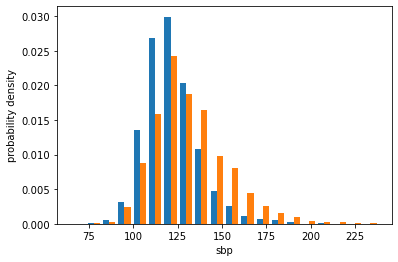

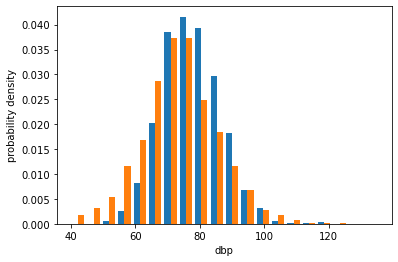

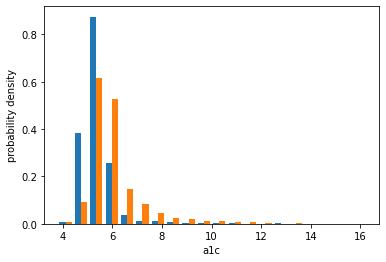

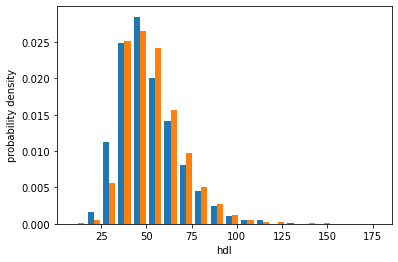

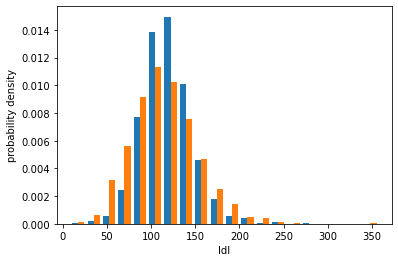

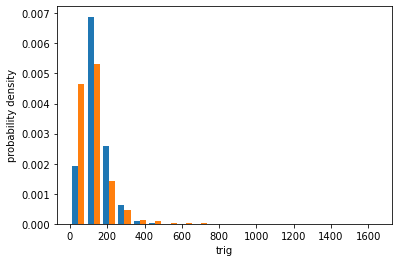

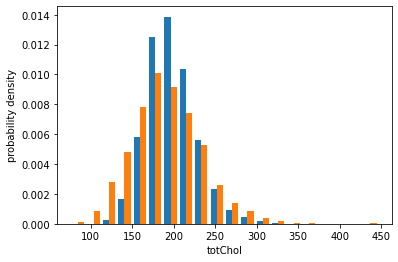

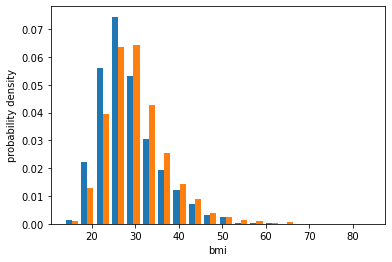

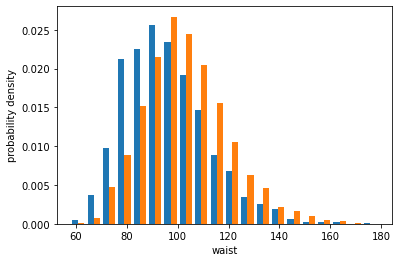

In [123]:
for i in range(len(riskfactors)):
    plt.figure()
    plt.hist([AliveVVRS[riskfactors[i]],NHANESCompGroup[riskfactorsNHANES[i]]],bins=20,density=True)
    plt.xlabel(riskfactors[i])
    plt.ylabel("probability density")
    plt.show()

In [131]:
# NHANES DBP mean 71.6, totChol mean 196.8
list(map(lambda x: [riskfactors[x],statistics.mean(AliveVVRS[riskfactors[x]]),statistics.mean(NHANESCompGroup[riskfactorsNHANES[x]])], range(len(riskfactors))))

[['sbp', 122.21394314093061, 131.20994703740485],
 ['dbp', 77.81360444103849, 73.76506123800067],
 ['a1c', 5.42866283643604, 6.0491559086395235],
 ['hdl', 51.020404729144936, 53.65143992055611],
 ['ldl', 119.36775245278251, 114.02656405163853],
 ['trig', 141.86384645398968, 121.36519364448858],
 ['totChol', 198.4432979420483, 190.69364448857993],
 ['bmi', 28.4526028483708, 30.117624131082422],
 ['waist', 95.96050122198842, 102.94684707050645]]

In [132]:
# NHANES DBP SD 10.9, totChol SD 41.3
list(map(lambda x: [riskfactors[x],statistics.stdev(AliveVVRS[riskfactors[x]]),statistics.stdev(NHANESCompGroup[riskfactorsNHANES[x]])], range(len(riskfactors))))

[['sbp', 15.358214851834108, 20.650667013313587],
 ['dbp', 9.154534499589172, 11.941801715806122],
 ['a1c', 0.7507583466999092, 1.2044870099184026],
 ['hdl', 16.15547498274008, 16.12804658590262],
 ['ldl', 28.242944516082794, 37.59070202166841],
 ['trig', 60.278322759828285, 91.22065172293568],
 ['totChol', 29.795298519770228, 42.14092371468523],
 ['bmi', 6.728551895466837, 7.146537945720199],
 ['waist', 16.32676789894694, 16.398586991447324]]

### Validation of Cardiovascular Event Incidence and Mortality (VCEIM)

In [133]:
sizePopVCEIM=15000

In [134]:
start_time=time.time()
AliveVCEIM, DFVCEIM, PopVCEIM = buildRunAndAdvance(sizePopVCEIM,16,None,None)
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

population size: 15000
20.698723467191062


In [135]:
from microsim.population import Population

In [19]:
from microsim.outcome import OutcomeType

In [137]:
# Q population.py line 710: I think it is just returning the people that had events, correct? (comment may not be
# accurate on line 710)
# Q: I think this returns the (standardized incidence, #number of events) where standardized incidence
# is just #number of events * weight, correct?
# Q: I have not looked into the warnings I get here
# JB simulation MI incidence was 234
Population.calculate_mean_age_sex_standardized_incidence(PopVCEIM,OutcomeType.MI,2016,None,None)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

(265.98810066021844, 586)

In [138]:
# JB simulation STROKE incidence was 153
Population.calculate_mean_age_sex_standardized_incidence(PopVCEIM,OutcomeType.STROKE,2016,None,None)

(162.56481726232454, 391)

In [139]:
# Q: unsure how to set subpopulationfilter and subpopulationDFfilter
# Goal here was to filter and analyze only blacks
Population.calculate_mean_age_sex_standardized_incidence(PopVCEIM,OutcomeType.MI,2016,lambda x:x._black,lambda x:x.black)

(282.8293383726001, 61)

In [140]:
Population.calculate_mean_age_sex_standardized_incidence(PopVCEIM,OutcomeType.STROKE,2016,lambda x:x._black,lambda x:x.black)

(275.95042882704547, 52)

 ### Validation of Treatment Effects (VTE)

In [141]:
from microsim.bp_treatment_strategies import AddASingleBPMedTreatmentStrategy

In [142]:
sizePopVTE=30000

In [143]:
start_time=time.time()
AliveVTEsingle, DFVTEsingle, PopVTEsingle = buildRunAndAdvance(sizePopVTE,5,AddASingleBPMedTreatmentStrategy(),None)
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

population size: 30000


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


19.892726747194924


In [144]:
# Q: is None the average standard treatment?
start_time=time.time()
AliveVTEcurrent, DFVTEcurrent, PopVTEcurrent = buildRunAndAdvance(sizePopVTE,5,None,None)
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

population size: 30000


/Volumes/GoogleDrive/My Drive/OSU/microsim/microsim/gfr_equation.py:72: RuntimeWarning: invalid value encountered in double_scalars
  return constant * (x.creatinine / crThreshold) ** exponent * 0.993**x.age


17.11042963663737


In [152]:
eventsSTROKEsingle=0
for i in range(sizePopVTE):
    if(PopVTEsingle._people.iloc[i].has_stroke_during_simulation()): eventsSTROKEsingle += 1.
print(eventsSTROKEsingle)

137.0


In [153]:
eventsSTROKEcurrent=0
for i in range(sizePopVTE):
    if(PopVTEcurrent._people.iloc[i].has_stroke_during_simulation()): eventsSTROKEcurrent += 1.
print(eventsSTROKEcurrent)

245.0


In [154]:
# relative probability (for the entire simulation period)
(eventsSTROKEsingle/sizePopVTE)/(eventsSTROKEcurrent/sizePopVTE)

0.5591836734693878

In [155]:
eventsMIsingle=0
for i in range(sizePopVTE):
    if(PopVTEsingle._people.iloc[i].has_mi_during_simulation()): eventsMIsingle += 1.
print(eventsMIsingle)

304.0


In [156]:
eventsMIcurrent=0
for i in range(sizePopVTE):
    if(PopVTEcurrent._people.iloc[i].has_mi_during_simulation()): eventsMIcurrent += 1.
print(eventsMIcurrent)

341.0


In [157]:
# relative probability (for the entire simulation period)
(eventsMIsingle/sizePopVTE)/(eventsMIcurrent/sizePopVTE)

0.8914956011730204

In [158]:
# I thought it was returning the number of events, it returns events per year for everyone
PopVTEsingle.get_events_for_event_type(lambda x: x.has_outcome_during_simulation(OutcomeType.STROKE),
            lambda x: x.get_outcomes_during_simulation(OutcomeType.STROKE)[0][0] - x._age[0] + 1,None,None)

,age,baseAge,gender,raceEthnicity,black,sbp,dbp,a1c,current_diabetes,gfr,hdl,ldl,trig,totChol,bmi,anyPhysicalActivity,education,afib,alcoholPerWeek,creatinine,antiHypertensiveCount,current_bp_treatment,statin,otherLipidLoweringMedicationCount,waist,smokingStatus,current_smoker,dead,gcpRandomEffect,miPriorToSim,mi,stroke,ageAtFirstStroke,ageAtFirstMI,ageAtFirstDementia,miInSim,strokePriorToSim,strokeInSim,dementia,gcp,baseGcp,gcpSlope,totalYearsInSim,totalQalys,totalBPMedsAdded,bpMedsAdded,populationIndex,sbp0,sbp1,sbp2,sbp3,sbp4,sbp5,dbp0,dbp1,dbp2,dbp3,dbp4,dbp5,a1c0,a1c1,a1c2,a1c3,a1c4,a1c5,hdl0,hdl1,hdl2,hdl3,hdl4,hdl5,ldl0,ldl1,ldl2,ldl3,ldl4,ldl5,trig0,trig1,trig2,trig3,trig4,trig5,totChol0,totChol1,totChol2,totChol3,totChol4,totChol5,bmi0,bmi1,bmi2,bmi3,bmi4,bmi5,anyPhysicalActivity0,anyPhysicalActivity1,anyPhysicalActivity2,anyPhysicalActivity3,anyPhysicalActivity4,anyPhysicalActivity5,afib0,afib1,afib2,afib3,afib4,afib5,waist0,waist1,waist2,waist3,waist4,waist5,alcoholPerWeek0,alcoholPerWeek1,alcoholPerWeek2,alcoholPerWeek3,alcoholPerWeek4,alcoholPerWeek5,creatinine0,creatinine1,creatinine2,creatinine3,creatinine4,creatinine5,age0,age1,age2,age3,age4,age5,antiHypertensiveCount0,antiHypertensiveCount1,antiHypertensiveCount2,antiHypertensiveCount3,antiHypertensiveCount4,antiHypertensiveCount5,statin0,statin1,statin2,statin3,statin4,statin5,bpMedsAdded0,bpMedsAdded1,bpMedsAdded2,bpMedsAdded3,bpMedsAdded4,bpMedsAdded5,female,event1,event2,event3,event4,event5
0,41.0000,36.0000,2,2,False,89.9827,66.3578,6.0513,False,108.8380,36.1817,114.3494,162.0329,190.7516,30.7461,True,2,False,2,0.6831,1,True,False,0.0000,98.8806,2,True,False,2.6903,0,False,False,NaN,NaN,NaN,False,0,False,False,64.0784,72.7109,12.0689,5,6.0000,5,1,0,100.0000,95.3681,93.2824,91.8901,90.8359,89.9827,64.0000,66.6484,67.0675,66.9800,66.7091,66.3578,6.1000,6.0577,6.0476,6.0458,6.0477,6.0513,37.0000,36.2123,36.0644,36.0640,36.1115,36.1817,109.0000,111.3180,112.7972,113.5845,114.0569,114.3494,107.0000,139.5669,150.1055,155.7572,159.4178,162.0329,187.0000,188.0598,189.3211,190.0200,190.4605,190.7516,31.0100,30.8746,30.7767,30.7470,30.7407,30.7461,1,True,True,True,True,True,0.0008,False,False,False,False,False,100.4000,99.4054,99.0272,98.8866,98.8567,98.8806,2,2,2.0000,2.0000,2.0000,2.0000,0.6000,0.6439,0.6615,0.6716,0.6783,0.6831,36.0000,37.0000,38.0000,39.0000,40.0000,41.0000,0.0000,0,0.0000,0.0000,0.0000,1.0000,0.0000,False,False,False,False,False,0,1,1.0000,1.0000,1.0000,1.0000,1,False,False,False,False,False
1,26.0000,21.0000,2,3,False,108.8201,92.2451,5.0928,False,137.3731,43.7097,116.9459,98.4998,180.7711,30.0343,False,3,False,1,0.4637,1,True,False,0.0000,98.3051,2,True,False,1.6765,0,False,False,NaN,NaN,NaN,False,0,False,False,57.8845,67.8593,4.1855,5,6.0000,5,1,1,116.0000,112.8945,110.8396,109.7167,109.5025,108.8201,89.3333,92.4172,92.1032,91.9792,92.7233,92.2451,5.1000,5.0900,5.1057,5.1092,5.0875,5.0928,47.0000,45.3451,44.7310,44.3239,43.9045,43.7097,105.0000,110.8916,112.9865,114.5132,116.3317,116.9459,86.0000,91.6031,93.1873,94.6760,97.4504,98.4998,170.0000,175.1371,176.8631,178.2373,180.1610,180.7711,30.2600,30.1215,30.1239,30.1051,30.0161,30.0343,0,False,False,False,False,False,0.0001,False,False,False,False,False,100.3000,99.1475,98.9537,98.7544,98.3015,98.3051,0,1,1.0000,1.0000,1.0000,1.0000,0.5000,0.4856,0.4851,0.4811,0.4690,0.4637,21.0000,22.0000,23.0000,24.0000,25.0000,26.0000,0.0000,1,1.0000,0.0000,0.0000,1.0000,0.0000,False,False,False,False,False,0,1,1.0000,1.0000,1.0000,1.0000,1,False,False,False,False,False
2,76.0000,71.0000,2,3,False,168.9057,81.6994,5.8744,False,91.0092,58.2919,107.9824,159.9086,201.7480,26.0761,True,4,False,1,0.5573,2,True,False,0.0000,95.2462,0,False,False,-5.3621,0,False,1,62.0000,NaN,NaN,False,1,False,False,46.0425,46.4686,0.6649,5,5.2560,5,1,2,188.0000,180.0044,176.0938,173.4873,170.5238,168.9057,99.3333,91.2841,87.8703,85.6728,83.0231,81.6994,5.7000,5.7542,5.7888,5.8126,5.8578,5.8744,59.0000,58.3245,58.1811,58.1287

In [165]:
# Q: I think this is number of events over personyears, hence the almost 0
# Q: is there a different function I can use to get relative risk?
Population.get_event_rate_in_simulation(PopVTEsingle,OutcomeType.STROKE,5)

0.0

### Validation of Dementia Incidence (VDI)

In [60]:
sizePopVDI=15000

In [61]:
start_time=time.time()
AliveVDIsingle, DFVDIsingle, PopVDIsingle = buildRunAndAdvance(sizePopVDI,20,None,None)
end_time=time.time()
wall_time = (end_time - start_time)/60.
print(wall_time)

population size: 15000
21.079340982437134


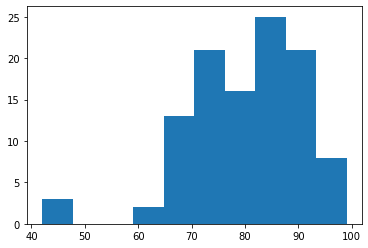

In [62]:
#just a histogram to get a feeling, not incidence rate
plt.hist(AliveVDIsingle[AliveVDIsingle["dementia"]==True]["age"])
plt.show()

In [172]:
# Q: this give a division by 0 error...was the population size not large enough?
PopVDIsingle.get_raw_incidence_by_age(OutcomeType.DEMENTIA)

ZeroDivisionError: division by zero

In [63]:
def get_raw_incidence_by_ageTEST(self, eventType): #event type is not used anywhere in the function
        popDF = self.get_people_current_state_as_dataframe()

        for year in range(1, self._totalWavesAdvanced + 1):
            eventVarName = "event" + str(year)
            ageVarName = "age" + str(year)
            popDF[ageVarName] = popDF["baseAge"] + year
            popDF[eventVarName] = [
                person.has_outcome_during_wave(year, OutcomeType.DEMENTIA) #perhaps this was meant to be eventType?
                for person in self._people
            ]

        popDF = popDF[
            list(filter(lambda x: x.startswith("age") or x.startswith("event"), popDF.columns))
        ]
        popDF["id"] = popDF.index
        popDF.drop(columns=["age"], inplace=True)
        
        #print(popDF)
        longAgesEvents = pd.wide_to_long(df=popDF, stubnames=["age", "event"], i="id", j="wave")
        #print(longAgesEvents)
        #print(longAgesEvents.groupby("age")["event"].sum())
        agesAliveDF = self.get_people_current_state_as_dataframe()
        for year in range(1, self._totalWavesAdvanced + 1):
            aliveVarName = "alive" + str(year)
            ageVarName = "age" + str(year)
            agesAliveDF[ageVarName] = agesAliveDF["baseAge"] + year
            agesAliveDF[aliveVarName] = [
                person.alive_at_start_of_wave(year) for i, person in self._people.iteritems()
            ]

        agesAliveDF = agesAliveDF[
            list(
                filter(lambda x: x.startswith("age") or x.startswith("alive"), agesAliveDF.columns)
            )
        ]
        agesAliveDF.drop(columns=["age"], inplace=True)
        agesAliveDF["id"] = agesAliveDF.index
        #print(agesAliveDF)
        longAgesDead = pd.wide_to_long(
            df=agesAliveDF, stubnames=["age", "alive"], i="id", j="wave"
        )
        #print(longAgesDead[longAgesDead["alive"]!=NaN])
        #print((longAgesDead.groupby("age")["alive"].sum()).loc[:,1]==0)
        longAgesDeadGrouped = longAgesDead.groupby("age")["alive"].sum()
        #print(longAgesDeadGrouped)
        #return longAgesDeadGrouped
        longAgesDeadGroupedIndex=longAgesDeadGrouped[longAgesDeadGrouped.iloc[:]!=0].index #one possible solution?
        
        longAgesEventsGrouped = longAgesEvents.groupby("age")["event"].sum()
        #longAgesDeadGrouped = longAgesDeadGrouped[longAgesDeadGrouped.]
        #return longAgesEventsGrouped,longAgesDeadGrouped,longAgesDeadGroupedIndex
        return (
            longAgesEventsGrouped[longAgesDeadGroupedIndex] 
            / longAgesDeadGrouped[longAgesDeadGroupedIndex] 
        )
        #return (
        #    longAgesEvents.groupby("age")["event"].sum()
        #    / longAgesDead.groupby("age")["alive"].sum()  #this is the cause of division by zero error
        #)


In [65]:
incidenceVDIdementia=get_raw_incidence_by_ageTEST(PopVDIsingle,OutcomeType.DEMENTIA)

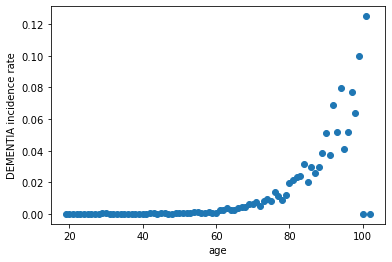

In [86]:
plt.scatter(incidenceVDIdementia.index,incidenceVDIdementia)
plt.xlabel("age")
plt.ylabel("DEMENTIA incidence rate")
plt.show()